In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = pd.read_csv("insurance.csv")

# EDA

In [4]:
ds.shape

(1338, 7)

In [5]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
ds.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

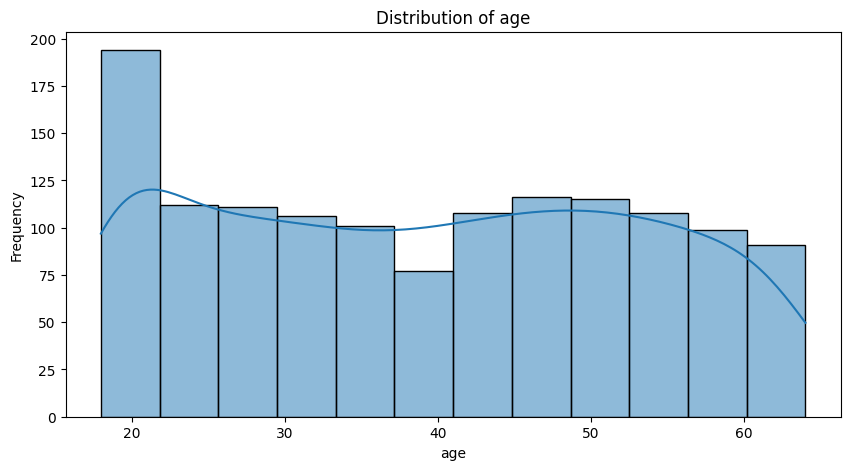

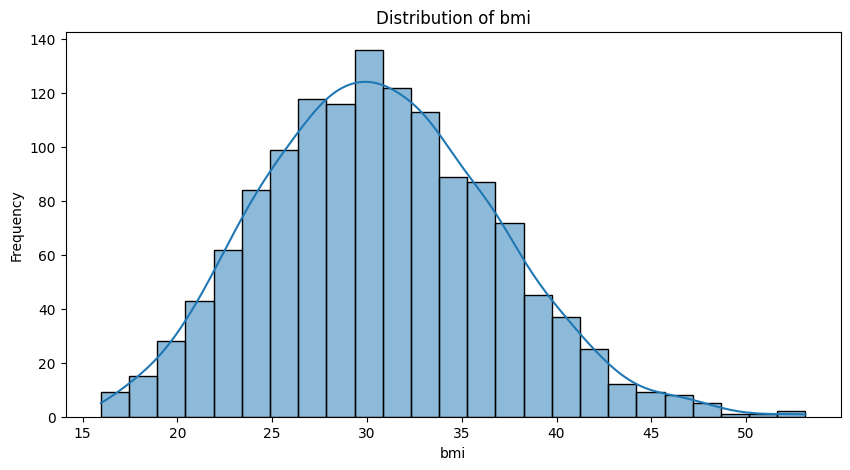

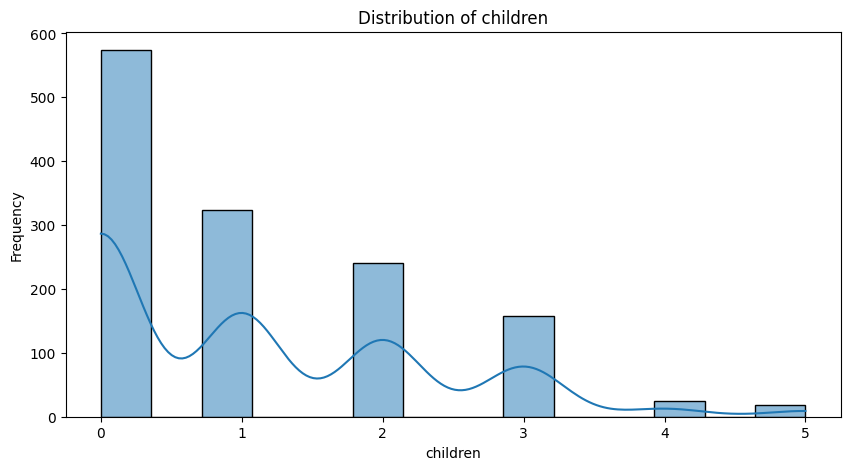

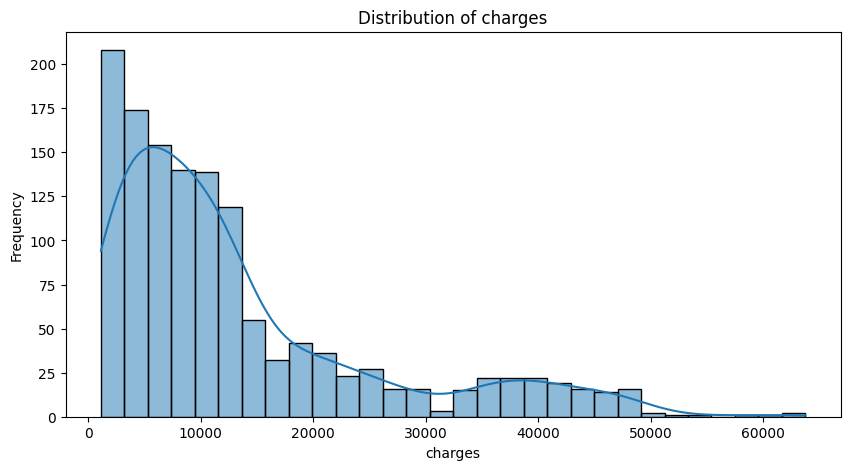

In [10]:
numeric_columns = ["age", "bmi", "children", "charges"]

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(ds[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

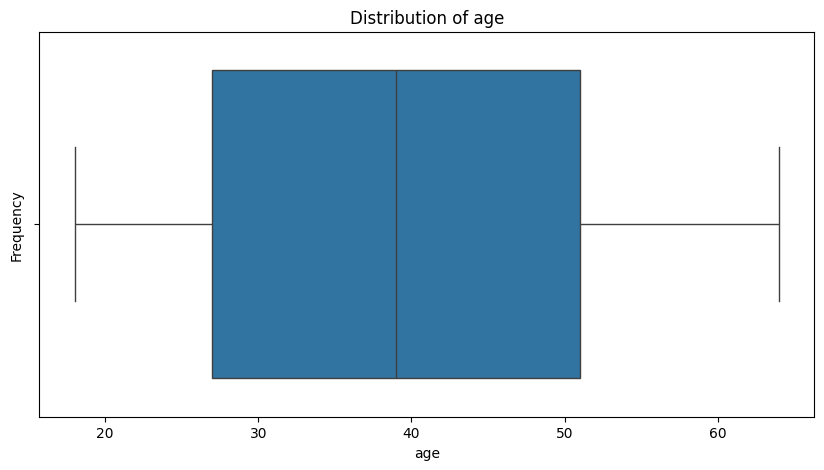

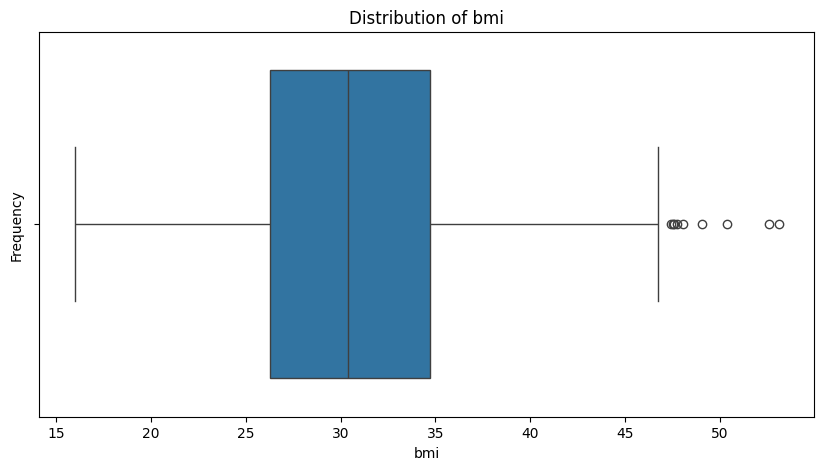

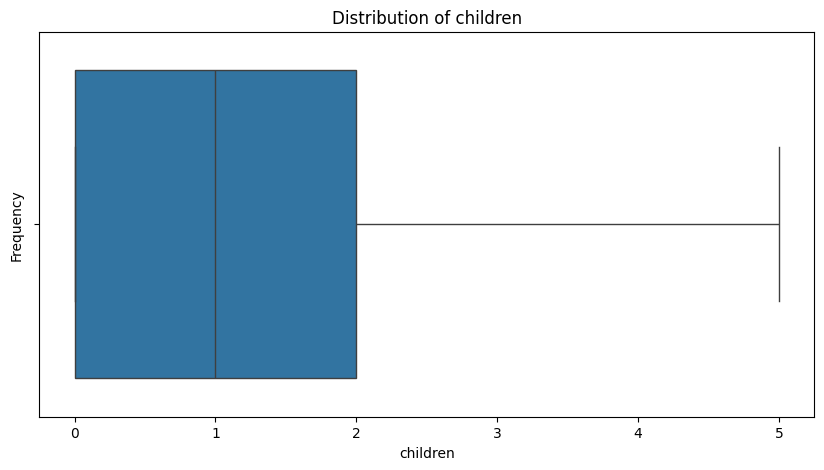

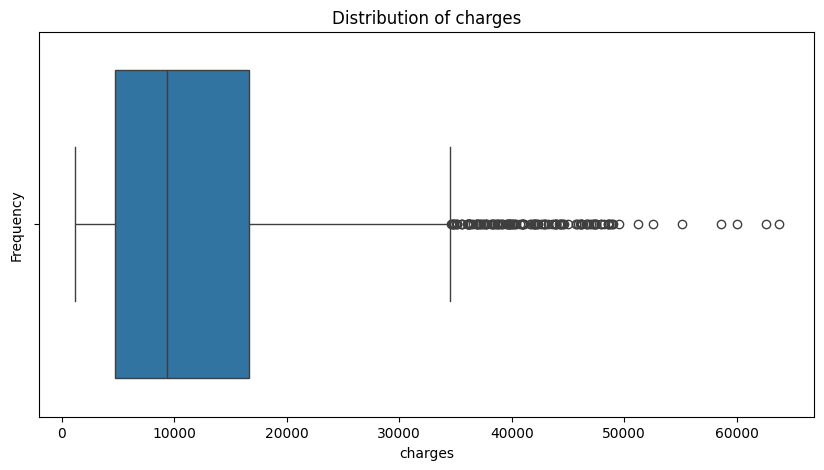

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=ds[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

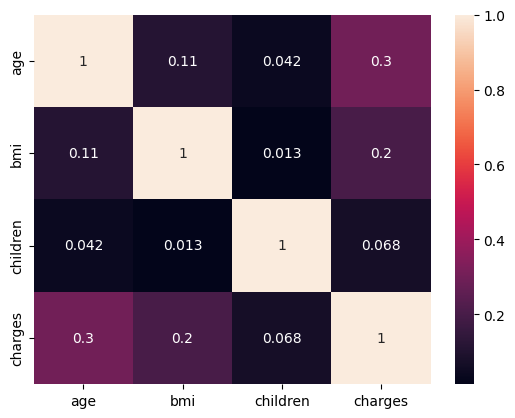

In [12]:
sns.heatmap(ds.corr(numeric_only=True), annot=True)
plt.show()

# Data Cleaning

In [13]:
ds_cleaned = ds.copy()  # Create a copy of the dataset for cleaning
ds_cleaned.head()  # Check the first few rows of the cleaned dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
ds_cleaned.shape  # Check the shape of the dataset

(1338, 7)

Handling Duplicate Values

In [15]:
ds_cleaned.duplicated().sum()  # Check for duplicate rows

np.int64(1)

In [16]:
ds_cleaned.drop_duplicates(inplace=True)  # Remove duplicate rows
ds_cleaned.shape  # Check the shape after removing duplicates

(1337, 7)

Handling Missing Values

In [17]:
ds_cleaned.isnull().sum()  # Check for missing values after cleaning

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# numeric_columns = ["age", "bmi", "children", "charges"]
# categorical_cols = ["sex", "smoker", "region"]


# ds_cleaned.fillna(ds_cleaned.mean(), inplace=True)  # Fill missing values with mean
# ds_cleaned.fillna(ds_cleaned.mode().iloc[0], inplace=True)  # Fill categorical missing values with mode

Converting Catagorical values to Numarical values

In [19]:
ds_cleaned.dtypes  # Check data types of the dataset

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
a = ds_cleaned["sex"].value_counts()
b = ds_cleaned["smoker"].value_counts()
c = ds_cleaned["region"].value_counts()
a, b, c  # Display value counts for categorical columns

(sex
 male      675
 female    662
 Name: count, dtype: int64,
 smoker
 no     1063
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    324
 northeast    324
 Name: count, dtype: int64)

In [21]:
ds_cleaned["sex"] = ds_cleaned["sex"].map({"male": 0, "female": 1})  # Convert categorical to numerical
ds_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
ds_cleaned["smoker"] = ds_cleaned["smoker"].map({"no": 0, "yes": 1})  # Convert categorical to numerical
ds_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [23]:
ds_cleaned.rename(columns={
    "sex" : "is_female",
    "smoker" : "is_smoker",
}, inplace=True)  # Rename columns for clarity
ds_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
ds_cleaned = pd.get_dummies(ds_cleaned, columns=["region"], drop_first=True)  # One-hot encoding for region
ds_cleaned = ds_cleaned.astype(int)  # Ensure all columns are of integer type
ds_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering and Extraction

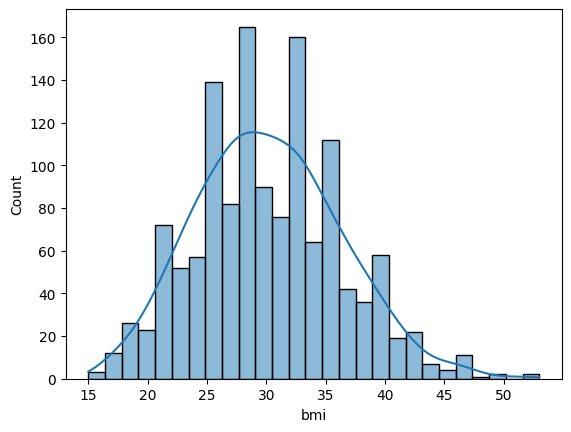

In [25]:
sns.histplot(ds_cleaned["bmi"], kde=True)
plt.show()

In [26]:
ds_cleaned["bmi_category"] = pd.cut(
    ds_cleaned["bmi"],
    bins=[0, 18.5, 24.9, 29.9, np.inf],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
    )
ds_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight


In [27]:
ds_cleaned = pd.get_dummies(ds_cleaned, columns=["bmi_category"], drop_first=True)  # One-hot encoding for BMI categories
ds_cleaned = ds_cleaned.astype(int)  # Ensure all columns are of integer type
ds_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


Stander_Scaling

In [28]:
ds_cleaned.columns  # Check the columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [29]:
columns = ["age","bmi","children"]

scaler = StandardScaler()  # Initialize the scaler
ds_cleaned[columns] = scaler.fit_transform(ds_cleaned[columns])  # Standardize the specified columns
ds_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [30]:
# Correlation of 'charges' with all other columns
correlations = ds_cleaned.corr()["charges"].sort_values(ascending=False)
print(correlations)

charges                    1.000000
is_smoker                  0.787234
age                        0.298309
bmi_category_Obese         0.200348
bmi                        0.196236
region_southeast           0.073577
children                   0.067390
region_northwest          -0.038695
region_southwest          -0.043637
is_female                 -0.058046
bmi_category_Normal       -0.104042
bmi_category_Overweight   -0.120601
Name: charges, dtype: float64


In [31]:
ds_final = ds_cleaned[["age","bmi","is_smoker","charges","bmi_category_Obese"]]
ds_final.head()

,age,bmi,is_smoker,charges,bmi_category_Obese
0,-1.440418,-0.517949,1,16884,0
1,-1.511647,0.462463,0,1725,1
2,-0.799350,0.462463,0,4449,1
3,-0.443201,-1.334960,0,21984,0
4,-0.514431,-0.354547,0,3866,0


In [34]:
final_df = ds_cleaned[["age","is_female","bmi","children","is_smoker","charges","region_southeast","bmi_category_Obese"]]
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [35]:
final_df.to_csv("final_dataset.csv", index=False)